# Import the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Import the dataset

In [2]:
dbts = pd.read_csv('diabetes.csv')

## Data inspection 

In [3]:
# Inintial data inspection
dbts.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Checking number of columns and rows
# 768 rows
# 9 column
dbts.shape

(768, 9)

In [5]:
# Checking number of rows 
# 767 rows
dbts.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# Quick check of null 
dbts.isnull().sum()
# Hmm okay, looks neat huh, well...never trust calm water.
# lets investigate more

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# More information about dataset
# Type of Dtype for every column 
dbts.info()
# Well from here we can see there is no null values
# Lets keep exploring maybe there is some hidden truth!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Summary statistics of the dataset
dbts.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Have you guys noticed something? The values for Glucose, Blood pressure, skin thickness, insulin and BMI minimum values are zero! This doesn't make any sense right?

Outlier alert, the maximum values for insulin also abnormal which is 847. Well the max pregnancies is 17.. lot of kids arent ya.. this also can be count as outlier. It does possible.. but does it likely to happen a lot?

In [9]:
# lets replace the zero values with np.nan

In [10]:
dbts.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
dbts[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']] = dbts[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0,np.nan)

In [12]:
# lets check the summary statistic
dbts.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Now we have much better dataset

In [13]:
# lets check the total of null we have
dbts.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
# Lets get a better idea of why some data might be missing.
dbts[dbts.isnull().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


We can notice that most rows with missing data have missing values in more than one column. We can see the pattern that every column with missing data also relate with the insulin column. 

## Data cleaning

Before cleaning or replacing nan with mean or any values
let see the distribution for each attributes

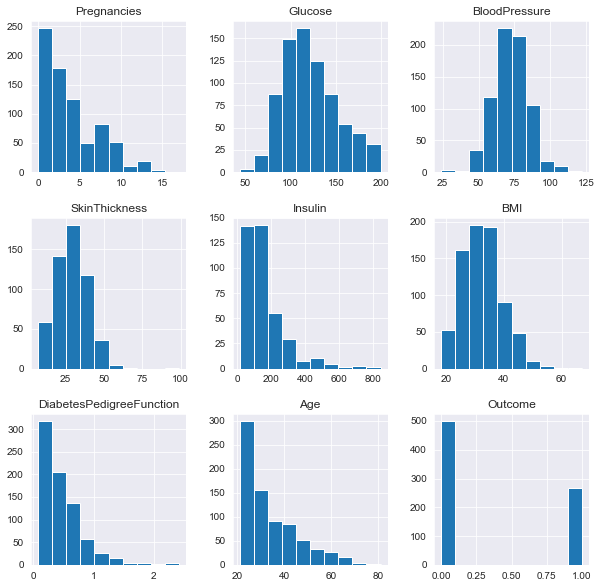

In [15]:
sns.set_style('dark')
dist = dbts.hist(figsize=(10,10))

In [16]:
# Filling missing null values
lis = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
for i in list(lis):
    dbts[i].fillna(dbts[i].mean(), inplace = True)

In [17]:
# Quick null check
dbts.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

---

## Exploratory data analysis (EDA)

Now lets get more insight from the dataset!

In [18]:
# lets see the clean data
dbts.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


0 and 1 from Outcome column values might hard to be interpret, lets make a quick adjustment to that.

In [19]:
dbts.Outcome.replace({0:"Healthy",1:"Diabetic"}, inplace=True)

In [20]:
# Now others people might easy to understand. Soon you will understand why xD
# However, people prefer to not convert the Outcome column values to string or etc for machine learning purposes.
# For this case lets just do it.
dbts.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,Diabetic
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,Healthy
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,Diabetic
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,Healthy
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,Diabetic


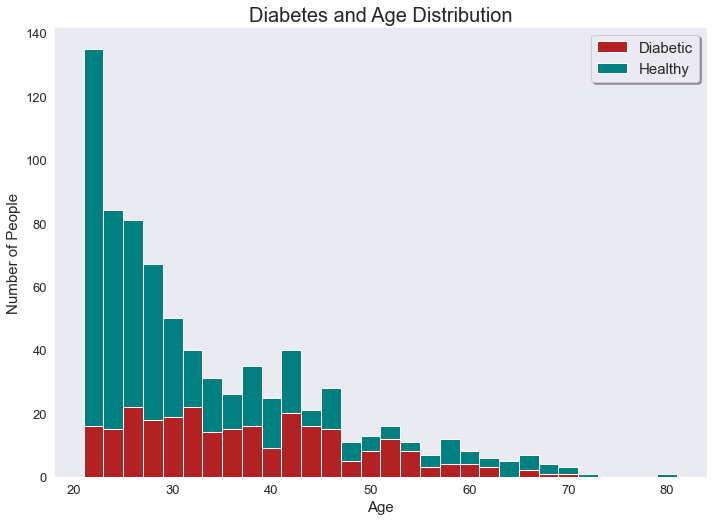

In [93]:
dbts.Outcome = dbts.Outcome.astype('category')
lis = []
leg = []
for res in dbts.Outcome.cat.categories:
    lis.append(dbts[dbts.Outcome == res].Age)
    leg.append(res)
    
sns.set_style('dark')   
fig, ax = plt.subplots()   
fig.set_size_inches(11.7,8.27)
h = plt.hist(lis, bins=30,stacked=True, rwidth=1, label=leg , color=['firebrick','teal'])
plt.title("Diabetes and Age Distribution", fontsize=20,)
plt.ylabel("Number of People", fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.legend(frameon=True, fancybox=True, shadow=True, prop={'size':15})
plt.show()

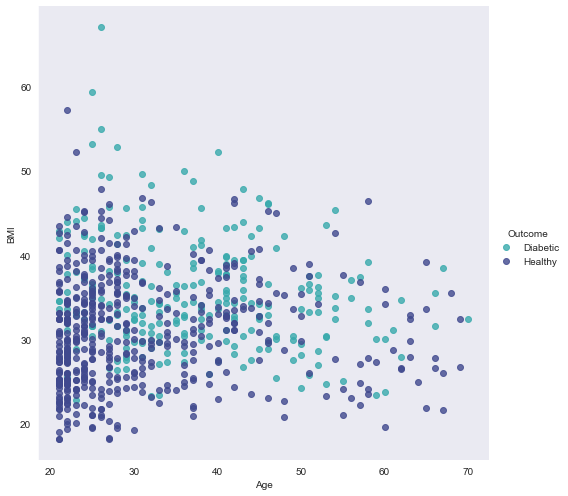

In [99]:
k1 = sns.lmplot(data=dbts[dbts.Age <= 70], x='Age', y='BMI', fit_reg=False, hue='Outcome',size=7, palette='mako_r')

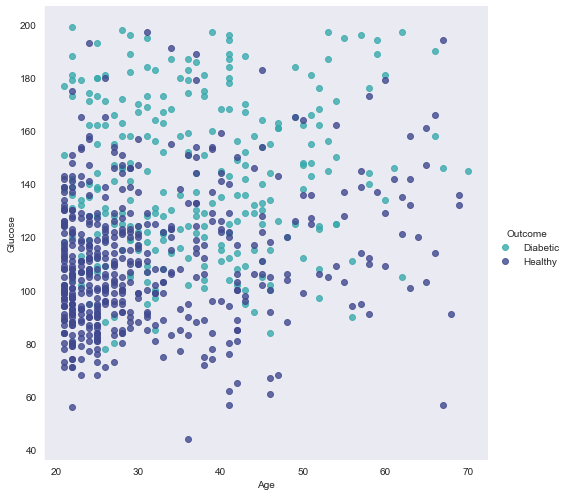

In [97]:
k1 = sns.lmplot(data=dbts[dbts.Age <= 70], x='Age', y='Glucose', fit_reg=False, hue='Outcome', palette='mako_r',size=7)

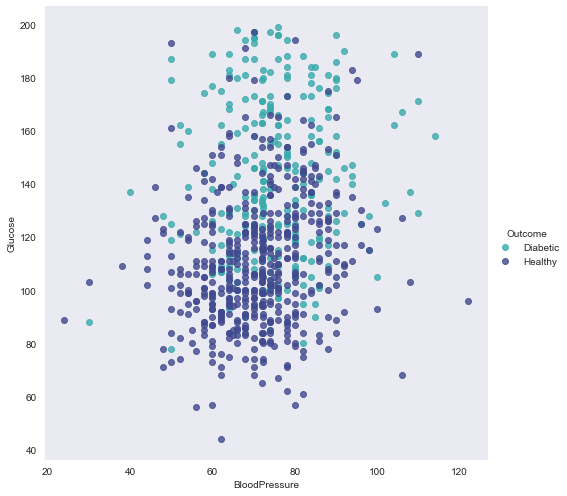

In [100]:
k1 = sns.lmplot(data=dbts[dbts.Age <= 70], x='BloodPressure', y='Glucose', fit_reg=False, hue='Outcome', palette='mako_r',size=7)

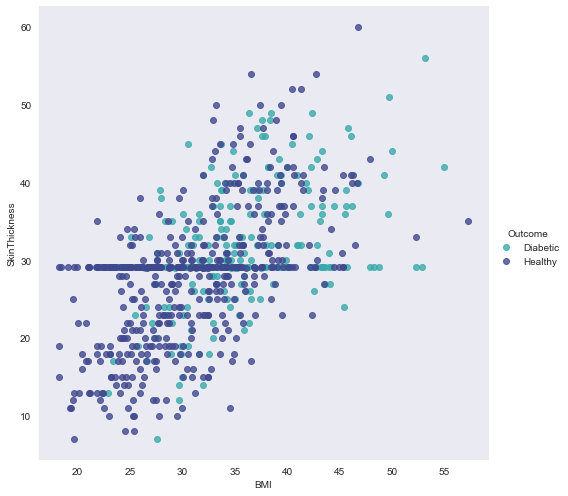

In [109]:
k1 = sns.lmplot(data=dbts[(dbts.SkinThickness <= 60) & (dbts.BMI <= 60)], x='BMI', y='SkinThickness', fit_reg=False, hue='Outcome', palette='mako_r',size=7)

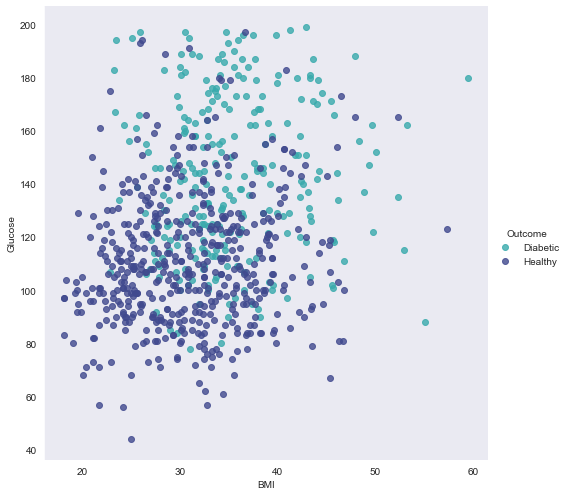

In [111]:
k1 = sns.lmplot(data=dbts[(dbts.Age <= 70) & (dbts.BMI <= 60)], x='BMI', y='Glucose', fit_reg=False, hue='Outcome', palette='mako_r',size=7)

## Overall

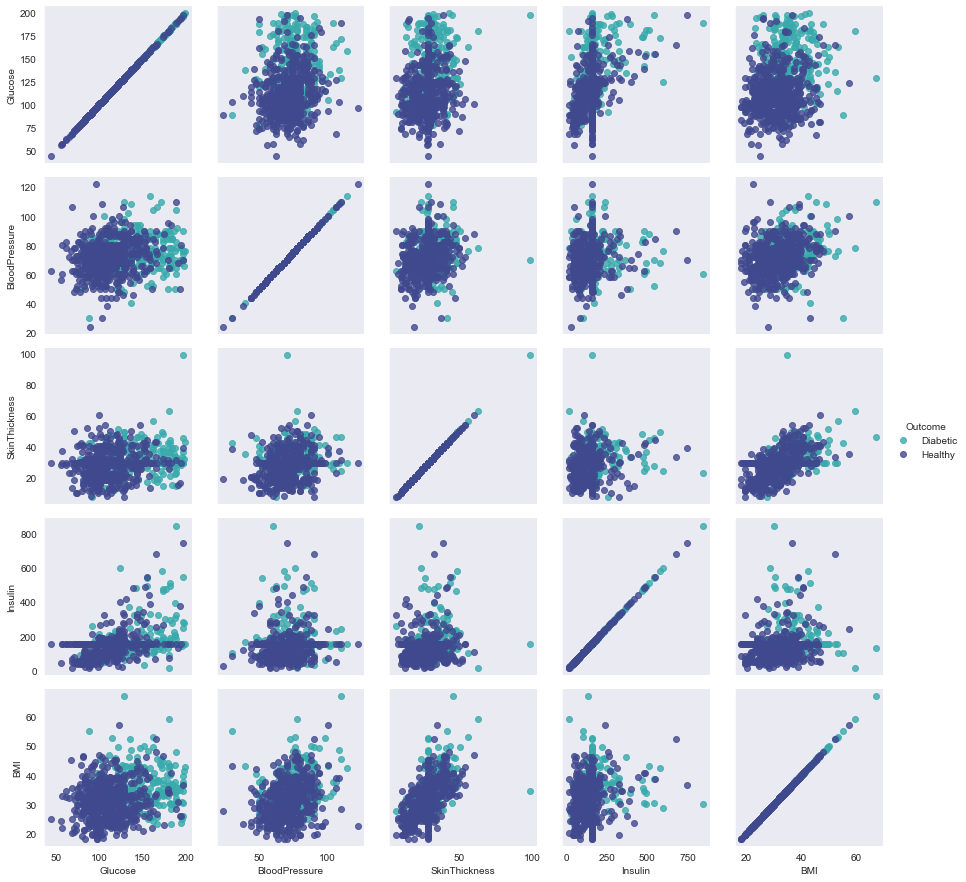

In [122]:
g = sns.PairGrid(dbts, vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI'],
                 hue='Outcome', palette='mako_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();